In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from time import time
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_excel('/content/drive/MyDrive/elai/othervariety.xlsx')
df['Price Date'] = pd.to_datetime(df['Price Date'])
df = df.set_index('Price Date')
df = df.sort_index()

In [44]:
df.head()

Max Price
Price Date           
2010-01-05       1601
2010-01-06       1755
2010-01-07       1741
2010-01-11       1501
2010-01-12       1454

In [35]:
df.describe()

Max Price
count   2319.000000
mean    1716.122035
std     1380.431740
min      201.000000
25%      898.000000
50%     1360.000000
75%     2000.500000
max    31825.000000

In [48]:
weekly_data = df.resample('W').mean()

In [49]:
weekly_data = weekly_data['Max Price']

In [50]:
print(weekly_data)

Price Date
2010-01-10    1699.000000
2010-01-17    1478.666667
2010-01-24    1643.200000
2010-01-31            NaN
2010-02-07    1376.500000
                 ...     
2022-12-04    1430.250000
2022-12-11    1282.400000
2022-12-18    1367.166667
2022-12-25    1664.166667
2023-01-01    1480.400000
Freq: W-SUN, Name: Max Price, Length: 678, dtype: float64


In [51]:
weekly_data.isnull().sum()

123

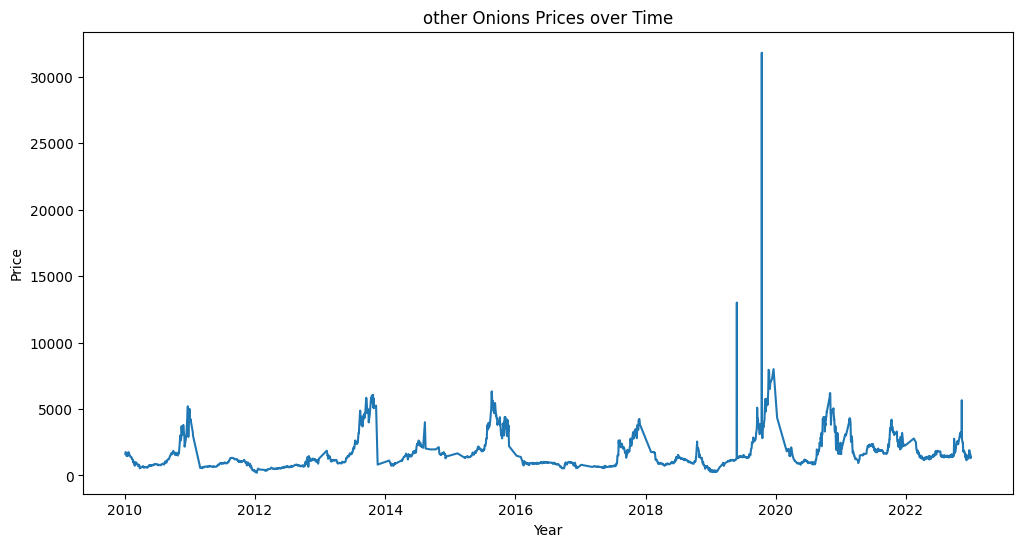

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('other Onions Prices over Time')

plt.show()

In [6]:
print(df.index.duplicated().sum())

0


In [7]:
ts_data = df[['Max Price']].copy()
ts_data = ts_data.asfreq('D')  # Set the frequency to daily
# Fill missing values using linear interpolation
ts_data = ts_data.interpolate(method='linear')
# Optionally, you can also perform backfill (use the next available value)
# for any remaining missing values at the beginning of the time series
ts_data = ts_data.bfill()
if ts_data.isnull().values.any():
  ts_data = ts_data.fillna(method='ffill')  # Forward fill missing values

In [8]:
ts_data

Max Price
Price Date           
2010-01-05     1601.0
2010-01-06     1755.0
2010-01-07     1741.0
2010-01-08     1681.0
2010-01-09     1621.0
...               ...
2022-12-27     1600.5
2022-12-28     1561.0
2022-12-29     1540.0
2022-12-30     1301.0
2022-12-31     1360.0

[4744 rows x 1 columns]

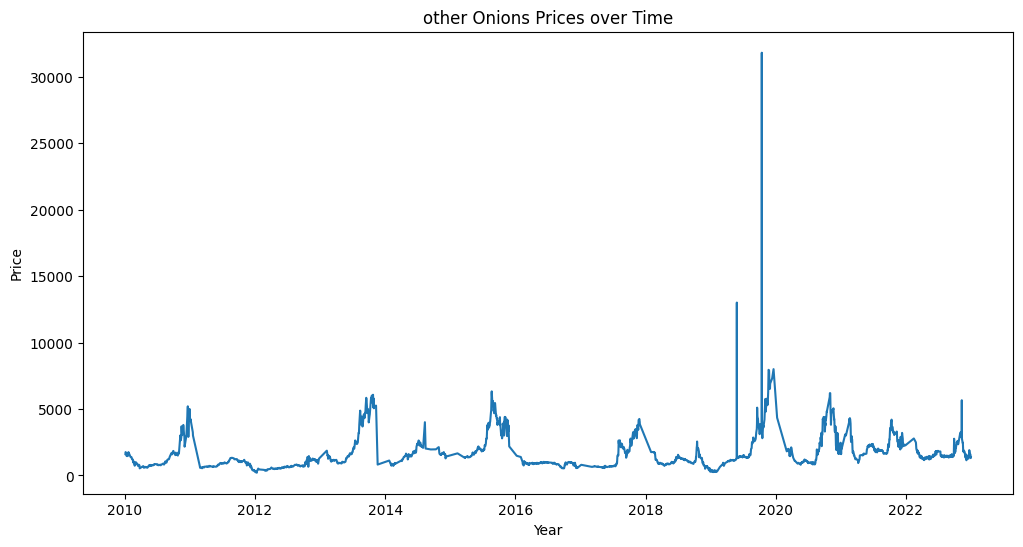

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('other Onions Prices over Time')

plt.show()

In [10]:
cutoff_date = pd.to_datetime('2022-01-01')
train_data = ts_data.loc[:cutoff_date]
test_data = ts_data.loc[cutoff_date + pd.DateOffset(1):]

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller_test= adfuller(ts_data)
print("pvalue of adfuller test for red onions is ",adfuller_test[1])
#if the pvalue is greater than 0.05 the series is not stationary

pvalue of adfuller test for red onions is  0.0003244754328155476


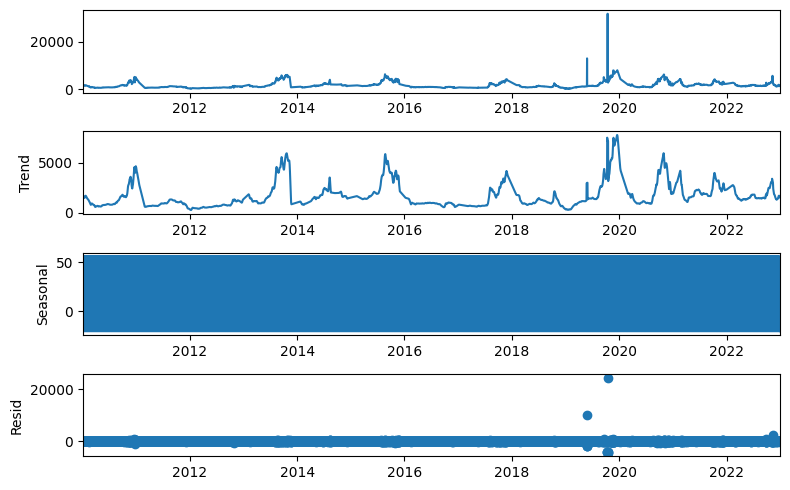

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [8, 5]

decompose1 = seasonal_decompose(ts_data, model="additive")
decompose1.plot()
plt.show()


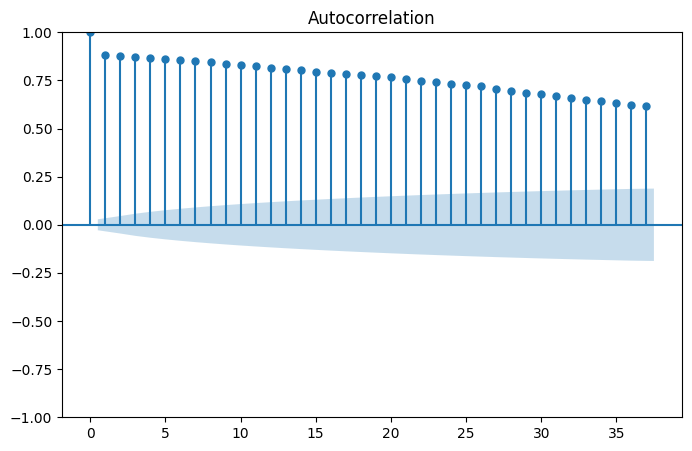

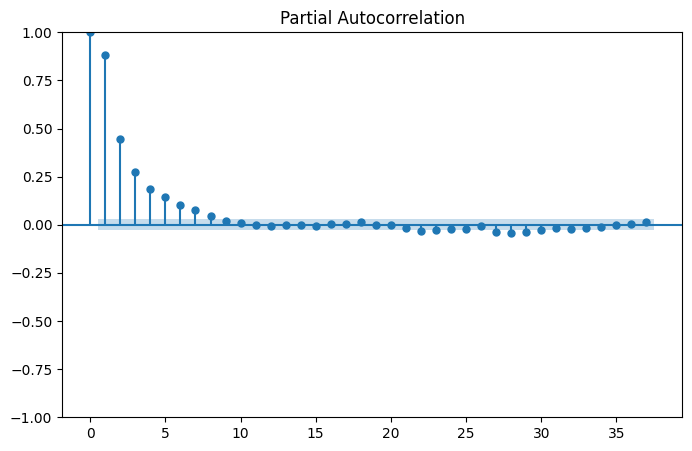

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_data)
plt.show()
plot_pacf(ts_data)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [ ]:
p=range(0,8)
q=range(0,8)
d=range(0,2)
pdq_comb = list(itertools.product(p,d,q))
len(pdq_comb)

128

In [ ]:
rmse=[]
order1=[]
for pdq in pdq_comb:
    model=ARIMA(train_data,order=pdq).fit()
    pred= model.predict(start=len(train_data),end=(len(ts_data)-1))
    error=np.sqrt(mean_squared_error(test_data,pred))
    order1.append(pdq)
    rmse.append(error)

In [ ]:
results=pd.DataFrame(index=order1,data=rmse,columns=["RMSE"])

In [ ]:
results.to_csv("Arima_results_otheronions.csv")

In [14]:
model = sm.tsa.ARIMA(train_data, order=(4, 0, 4))  # Example: ARIMA(1, 0, 0) model
trained_model = model.fit()

In [15]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Max Price   No. Observations:                 4380
Model:                 ARIMA(4, 0, 4)   Log Likelihood              -33767.113
Date:                Thu, 25 May 2023   AIC                          67554.226
Time:                        06:01:57   BIC                          67618.074
Sample:                    01-05-2010   HQIC                         67576.754
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1717.9635    550.822      3.119      0.002     638.372    2797.555
ar.L1          0.1185      0.108      1.093      0.275      -0.094       0.331
ar.L2          1.7253      0.117     14.734      0.000       1.496       1.955
ar.L3          0.0952      0.145      0.654      0.513      -0.190       0.380
ar.L4         -0.9403      0.125     -7.546      0.000      -1.185      -0.696
ma.L1          0.1349      0.109      1.238      0.216      -0.079       0.348
ma.L2         -1.5023      0.098    -15.402      0.000      -1.693      -1.311
ma.L3         -0.3064      0.137     -2.230      0.026      -0.576      -0.037
ma.L4          0.7072      0.093      7.618      0.000       0.525       0.889
sigma2      2.926e+05    935.006    312.978      0.000    2.91e+05    2.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):         610350469.46
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              20.44   Skew:                            34.72
Prob(H) (two-sided):                  0.00   Kurtosis:                      1830.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
forecast = trained_model.get_forecast(steps=len(test_data))
predicted_prices = forecast.predicted_mean

In [17]:
actual_prices = test_data['Max Price']
error = predicted_prices - actual_prices

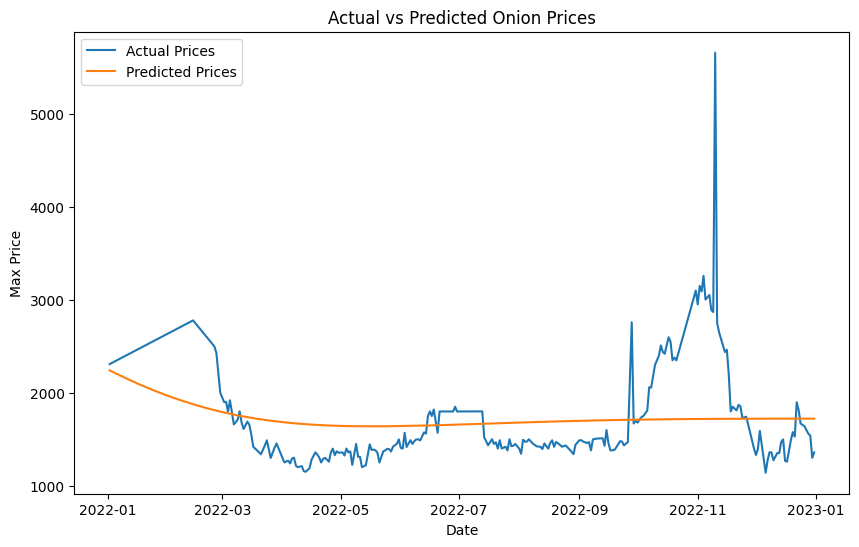

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices')
plt.plot(predicted_prices.index, predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Max Price')
plt.title('Actual vs Predicted Onion Prices')
plt.legend()
plt.show()

In [ ]:
#alternative method

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook


def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
result_df = optimize_ARIMA(order_list, exog=train_data)

result_df

  0%|          | 0/64 [00:00<?, ?it/s]

(p, d, q)           AIC
0   (2, 1, 5)  67552.680621
1   (1, 1, 4)  67556.807526
2   (0, 1, 1)  67557.104727
3   (2, 1, 4)  67559.017962
4   (1, 1, 1)  67559.067155
..        ...           ...
59  (4, 1, 0)  67654.120579
60  (3, 1, 0)  67753.414041
61  (2, 1, 0)  67923.075319
62  (1, 1, 0)  68307.907360
63  (0, 1, 0)  69430.597009

[64 rows x 2 columns]

In [25]:
model_other = sm.tsa.ARIMA(train_data, order=(2, 1, 5))  # Example: ARIMA(1, 0, 0) model
trained_model_other = model_other.fit()

In [26]:
forecast_other = trained_model_other.get_forecast(steps=len(test_data))
predicted_prices_other = forecast_other.predicted_mean

In [27]:
actual_prices_other = test_data['Max Price']
error = predicted_prices_other - actual_prices_other

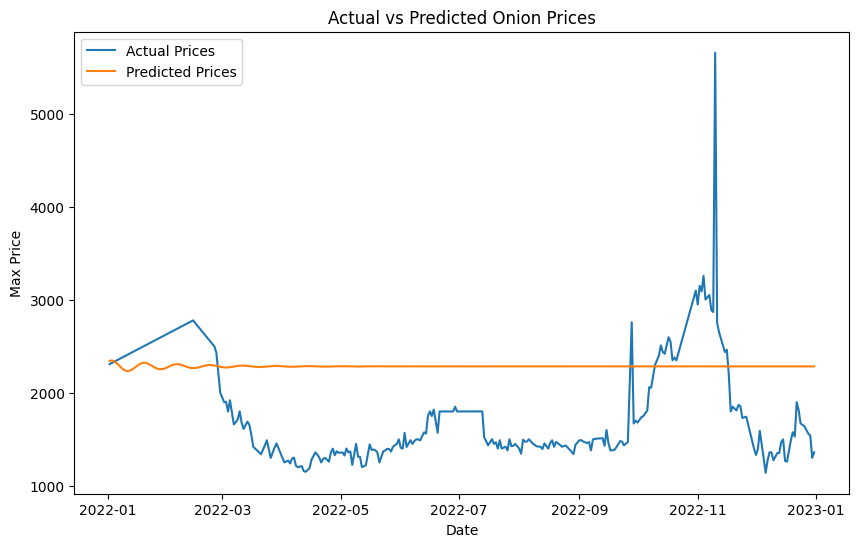

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices_other.index, actual_prices_other, label='Actual Prices')
plt.plot(predicted_prices_other.index, predicted_prices_other, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Max Price')
plt.title('Actual vs Predicted Onion Prices')
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

# Assuming your daily data is stored in the 'data' variable

# Find optimal order (P, D, Q) using auto_arima
model = pm.auto_arima(train_data, seasonal=True, m=12, suppress_warnings=True)
print("Optimal (p, d, q) order:", model.order)
print("Optimal (P, D, Q, S) order:", model.seasonal_order)


Optimal (p, d, q) order: (0, 1, 1)
Optimal (P, D, Q, S) order: (0, 0, 0, 12)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Define the SARIMA model
sarima_model = SARIMAX(train_data, order=(0, 1, 1), seasonal_order=(0, 0, 0, 12))

# Fit the model to the training data
sarima_model_fit = sarima_model.fit()


In [ ]:
# Predict future prices
predictions = sarima_model_fit.get_forecast(steps=len(test_data))

# Extract predicted values
predicted_values = predictions.predicted_mean


In [ ]:
# Calculate mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    mask = y_true != 0  # Create a mask to exclude zero values
    return (np.abs((y_true - y_pred) / y_true)[mask]).mean() * 100

# Calculate MAPE for the predicted values
mape_score = mape(test_data.values.flatten(), predicted_values.values.flatten())

# Print MAPE score
print(f"MAPE: {mape_score:.2f}%")

MAPE: 43.12%


In [ ]:
actual_prices = test_data['Max Price']
error = predicted_values - actual_prices

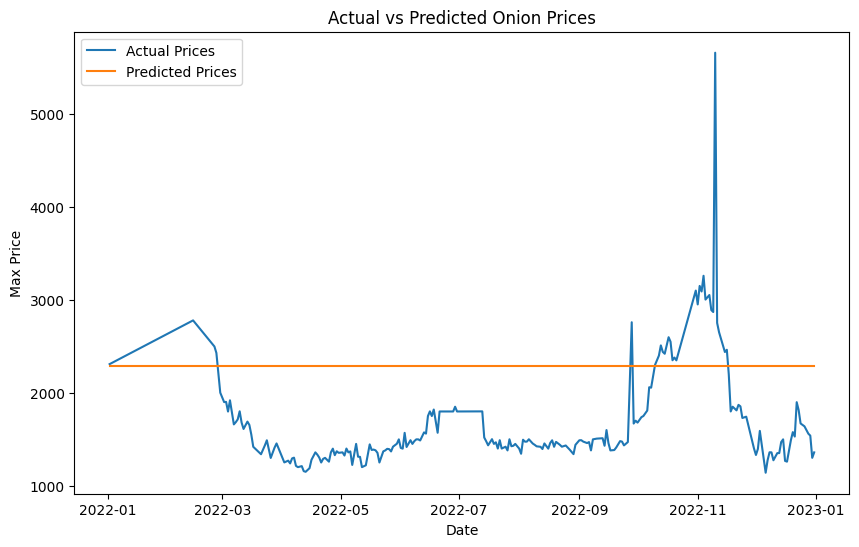

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices')
plt.plot(predicted_values.index, predicted_values, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Max Price')
plt.title('Actual vs Predicted Onion Prices')
plt.legend()
plt.show()